In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import numpy as np
from datetime import timedelta

### Carga y previsualización de los datos

Lo primero de todo es cargar ambos datasets, en el dataset de las estaciones vemos que el archivo .csv viene separado por ';' y contiene caracteres especiales como acentos por lo que debemos modificar el encoding

In [2]:
bases = pd.read_csv('C:/Users/asus/Desktop/data/bases_bicimad.csv', sep=';', encoding='ISO-8859-1')
bicis = pd.read_csv('C:/Users/asus/Desktop/data/bike_data.csv')

Podemos echar un vistazo al aspecto que tienen los dataframes, qué tamaño tienen y cuantos valores nulos contienen

In [3]:
bases.head()

,Número,Gis_X,Gis_Y,Fecha de Alta,Distrito,Barrio,Calle,Nº Finca,Tipo de Reserva,Número de Plazas,LONGITUD,LATITUD,DIRECCION
0,001a,"440394,55","4474280,53",41813,01 CENTRO,01-06 SOL,"PUERTA DEL SOL, PLAZA, DE LA",1 B,BiciMAD,24,-3.702575,40.417016,"PUERTA DEL SOL, PLAZA, DE LA,1 B"
1,001b,"440404,21","4474287,39",41813,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",1,BiciMAD,24,-3.702462,40.417078,"ALCALA, CALLE, DE,1"
2,2,"440134,83","4474678,23",41813,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,27,-3.705674,40.420580,"MIGUEL MOYA, CALLE, DE,1"
3,3,"440012,98","4475760,68",41813,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.707212,40.430322,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL,2"
4,4,"440396,4","4475565,36",41813,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,27,-3.702674,40.428591,"MANUELA MALASAÑA, CALLE, DE,3"


In [4]:
bicis.head()

,id,user_day_code,idplug_base,idunplug_base,idplug_station,idunplug_station,user_type,travel_time,ageRange,unplug_hourTime,zip_code
0,5b9058462f38434ab0d85cd3,ead1db07fa526e19fe237115d5516fbdc5acb99057b885...,5,17,16,40,1,263,0,2018-09-01T01:00:00.000+0200,NaN
1,5b9058462f38434ab0d85ce9,420d9e220bd8816681162e15e9afcb1c69c5a756090728...,12,26,52,85,1,382,2,2018-09-01T01:00:00.000+0200,28009
2,5b9058462f38434ab0d85ced,780f5c8157efe8e6dca44dbd689817d4b126364fca917f...,1,11,58,109,1,305,4,2018-09-01T01:00:00.000+0200,28004
3,5b9058462f38434ab0d85cee,a225ab7b4b74954cd9fbe8cc2ec63390cd04e92cdd1a2f...,1,1,120,168,1,262,4,2018-09-01T01:00:00.000+0200,28015
4,5b9058462f38434ab0d85cef,867f38545733bc5f0c69d2592d228e01b3a39daa143e8b...,19,8,80,89,1,310,4,2018-09-01T01:00:00.000+0200,28007


In [5]:
bases.shape

(172, 13)

In [6]:
bicis.shape

(398040, 11)

In [7]:
bases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 13 columns):
Número              172 non-null object
Gis_X               172 non-null object
Gis_Y               172 non-null object
Fecha de Alta       172 non-null int64
Distrito            172 non-null object
Barrio              172 non-null object
Calle               172 non-null object
Nº Finca            171 non-null object
Tipo de Reserva     172 non-null object
Número de Plazas    172 non-null int64
LONGITUD            172 non-null float64
LATITUD             172 non-null float64
DIRECCION           172 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 17.5+ KB


In [8]:
bicis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398040 entries, 0 to 398039
Data columns (total 11 columns):
id                  398040 non-null object
user_day_code       398040 non-null object
idplug_base         398040 non-null int64
idunplug_base       398040 non-null int64
idplug_station      398040 non-null int64
idunplug_station    398040 non-null int64
user_type           398040 non-null int64
travel_time         398040 non-null int64
ageRange            398040 non-null int64
unplug_hourTime     398040 non-null object
zip_code            213188 non-null object
dtypes: int64(7), object(4)
memory usage: 33.4+ MB


Para la variable zip_code vemos que el 46.44% de los datos son nulos

Aprovechando que tenemos información sobre latitud y longitud en nuestro dataframe de las bases, podemos usar la librería Folium para representar sobre un mapa la ubicación de cada una de ellas (proporcionando información sobre barrio y número de plazas al pasar el ratón por cada ubicación)

In [9]:
map_madrid = folium.Map(location=[40.42, -3.7], zoom_start=13)
bases.apply(
lambda row: folium.CircleMarker([row.LATITUD, row.LONGITUD], tooltip=[row.Barrio, row['Número de Plazas']], radius=4).add_to(map_madrid),
    axis=1)
map_madrid

Así como representar en un mapa de calor las zonas con mayor concentración de estaciones en Madrid

In [10]:
m = folium.Map(location=[40.42, -3.7], zoom_start=12.5, tiles='cartodbpositron')
heatmap = HeatMap(data=bases[["LATITUD", "LONGITUD"]], radius=20).add_to(m)
m

Ahora vamos a unir ambos dataframes, usando el número de estación de la que se desengancha la bicicleta como variable de cruce, pasando antes la variable 'idunplug_station' a formato string, al igual que la variable del dataframe de las estaciones  

In [11]:
bicis['idunplug_station'] = bicis['idunplug_station'].astype(str)

In [12]:
df = bicis.merge(bases, how='left', left_on='idunplug_station', right_on='Número')

Podemos ver los valores únicos para cada variable del dataframe resultante

In [13]:
df.nunique()

id                  398040
user_day_code       219444
idplug_base             30
idunplug_base           30
idplug_station         168
idunplug_station       168
user_type                4
travel_time           9289
ageRange                 7
unplug_hourTime        656
zip_code               496
Número                 152
Gis_X                  152
Gis_Y                  152
Fecha de Alta            9
Distrito                 8
Barrio                  34
Calle                  115
Nº Finca                67
Tipo de Reserva          1
Número de Plazas         7
LONGITUD               152
LATITUD                152
DIRECCION              145
dtype: int64

Comprobamos que hay 398,040 trayectos, 219,444 usuarios que hacen trayectos en fechas distintas, 8 distritos, 34 barrios, 1 solo tipo de reserva (biciMAD) y 152 estaciones únicas tras cruzar ambos dataframes

### Análisis exploratorio

Podemos ver el porcentaje del total de estaciones por cada distrito

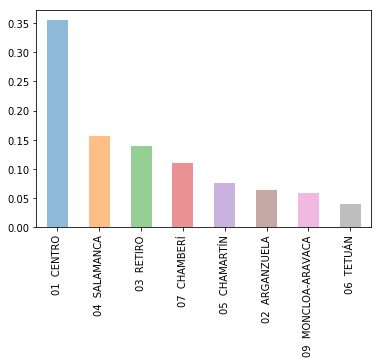

In [14]:
bases.Distrito.value_counts(normalize=True).plot(kind='bar', alpha=.5)
plt.show()

Vemos que los distritos de Centro y Salamanca son los que más estaciones tienen.

Así como el número de trayectos efectuados en dias diferentes para cada distrito, si quisiéramos mas granularidad podríamos realizar el mismo gráfico por calle o barrio

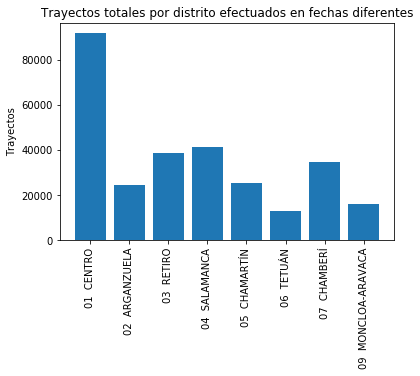

In [15]:
d1 = df.groupby('Distrito').agg({'user_day_code': 'nunique'}).reset_index()
plt.bar(d1.Distrito, d1.user_day_code)
plt.ylabel('Trayectos')
plt.title('Trayectos totales por distrito efectuados en fechas diferentes')
plt.xticks(rotation=90)
plt.show()

Y el número de plazas en cada distrito

In [16]:
bases.groupby('Distrito').agg({'Número de Plazas': 'sum'})

,Número de Plazas
Distrito,
01 CENTRO,1509
02 ARGANZUELA,264
03 RETIRO,597
04 SALAMANCA,660
05 CHAMARTÍN,312
06 TETUÁN,168
07 CHAMBERÍ,444
09 MONCLOA-ARAVACA,243


El 36% de las estaciones están ubicadas en el distrito 01 CENTRO

Ahora veamos qué porcentaje de todos los trayectos realizan los usuarios por su rango de edad y por su tipo

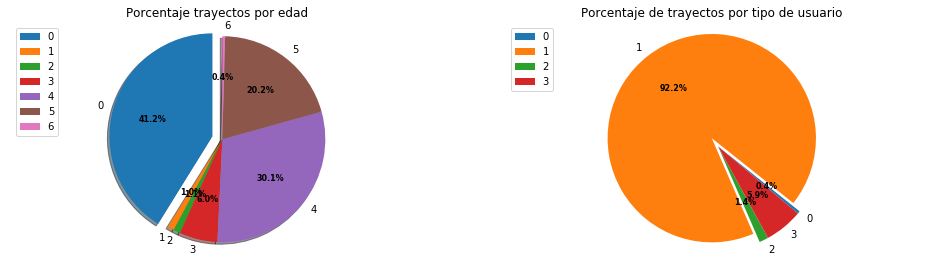

In [17]:
labels1 = list(range(7))
fracs1 = df.groupby('ageRange').size().reset_index()
fracs1 = list(fracs1[0]/df.shape[0])
explode1 = (0.1, 0, 0, 0, 0, 0, 0)

f,(ax1,ax2) = plt.subplots(1,2)

ws,texts, autotexts=ax1.pie(fracs1, explode=explode1, labels=labels1, autopct='%1.1f%%', shadow=True, startangle=90,
                                textprops=dict(color="black"))

plt.setp(autotexts, size=8, weight="bold")

plt.legend(ws, labels1,
          title="ageRange",
          loc="center right",
          bbox_to_anchor=(0.95, 0, 1, 1))

ax1.axis('equal')
ax1.set_title("Porcentaje trayectos por edad")

labels2 = list(range(4))
fracs2 = df.groupby('user_type').size().reset_index()
fracs2 = list(fracs2[0]/df.shape[0])
explode2 = (0, 0.1, 0, 0)
ws,texts, autotexts=ax2.pie(fracs2, explode=explode2, labels=labels2, autopct='%1.1f%%', shadow=False, startangle=-40,
                                textprops=dict(color="black"))

plt.setp(autotexts, size=8, weight="bold")
plt.legend(ws, labels2,
          title="user_type",
          loc="center left",
          bbox_to_anchor=(0.95, 0, 1, 1))
ax2.axis('equal')
ax2.set_title("Porcentaje de trayectos por tipo de usuario")

first_legend = ax1.legend(labels1, loc = 2)
second_legend = ax2.legend(labels2, loc = 2)
f.subplots_adjust(-0.1,0,2,0.8)
plt.show()



Podemos comprobar que la mayor parte de los trayectos son realizados por usuarios del tipo Anual con rango de edad entre 27 y 40 años (excluyendo aquellos usuarios a los que no se ha podido determinar su rango de edad)

Rangos de edad mas frecuentes agrupados por distrito y barrio (excluyendo al rango 0)

In [18]:
df.loc[df.ageRange!=0].groupby(['Distrito', 'Barrio']).agg({'ageRange':pd.Series.mode})

ageRange
Distrito            Barrio                         
01  CENTRO          01-01 PALACIO                 4
                    01-02 EMBAJADORES             4
                    01-03 CORTES                  4
                    01-04 JUSTICIA                4
                    01-05 UNIVERSIDAD             4
                    01-06 SOL                     4
02  ARGANZUELA      02-01 IMPERIAL                4
                    02-02 ACACIAS                 4
                    02-03 CHOPERA                 4
                    02-05 DELICIAS                4
                    02-06 PALOS DE MOGUER         4
                    02-07 ATOCHA                  4
03  RETIRO          03-01 PACÍFICO                4
                    03-02 ADELFAS                 4
                    03-03 ESTRELLA                5
                    03-04 IBIZA                   4
                    03-05 JERÓNIMOS               4
                    03-06 NIÑO JESÚS              4
04  SALAMANCA       04-01 RECOLETOS               4
                    04-02 GOYA                    4
                    04-05 LISTA                   4
                    04-06 CASTELLANA              4
05  CHAMARTÍN       05-01 EL VISO                 4
                    05-04 HISPANOAMÉRICA          4
                    05-05 NUEVA ESPAÑA            4
06  TETUÁN          06-02 CUATRO CAMINOS          4
                    06-03 CASTILLEJOS             4
07  CHAMBERÍ        07-01 GAZTAMBIDE              4
                    07-02 ARAPILES                4
                    07-03 TRAFALGAR               4
                    07-04 ALMAGRO                 4
                    07-05 RÍOS ROSAS              4
09  MONCLOA-ARAVACA 09-01 CASA DE CAMPO           4
                    09-02 ARGÜELLES               4

la mayoria de los trayectos efectuados en todos los barrios son usuarios con edad entre 27 y 40 años

Y lo mismo para el tipo de usuario

In [19]:
df.loc[df.user_type!=0].groupby(['Distrito', 'Barrio']).agg({'user_type':pd.Series.mode})

user_type
Distrito            Barrio                          
01  CENTRO          01-01 PALACIO                  1
                    01-02 EMBAJADORES              1
                    01-03 CORTES                   1
                    01-04 JUSTICIA                 1
                    01-05 UNIVERSIDAD              1
                    01-06 SOL                      1
02  ARGANZUELA      02-01 IMPERIAL                 1
                    02-02 ACACIAS                  1
                    02-03 CHOPERA                  1
                    02-05 DELICIAS                 1
                    02-06 PALOS DE MOGUER          1
                    02-07 ATOCHA                   1
03  RETIRO          03-01 PACÍFICO                 1
                    03-02 ADELFAS                  1
                    03-03 ESTRELLA                 1
                    03-04 IBIZA                    1
                    03-05 JERÓNIMOS                1
                    03-06 NIÑO JESÚS               1
04  SALAMANCA       04-01 RECOLETOS                1
                    04-02 GOYA                     1
                    04-05 LISTA                    1
                    04-06 CASTELLANA               1
05  CHAMARTÍN       05-01 EL VISO                  1
                    05-04 HISPANOAMÉRICA           1
                    05-05 NUEVA ESPAÑA             1
06  TETUÁN          06-02 CUATRO CAMINOS           1
                    06-03 CASTILLEJOS              1
07  CHAMBERÍ        07-01 GAZTAMBIDE               1
                    07-02 ARAPILES                 1
                    07-03 TRAFALGAR                1
                    07-04 ALMAGRO                  1
                    07-05 RÍOS ROSAS               1
09  MONCLOA-ARAVACA 09-01 CASA DE CAMPO            1
                    09-02 ARGÜELLES                1

Podemos calcular en una tabla la distribucion de usuarios por edad y tipo

In [20]:
pd.crosstab(df.ageRange, df.user_type)

user_type,0,1,2,3
ageRange,,,,
0,1624,151619,5535,5061
1,0,781,0,3248
2,0,4234,2,0
3,0,23220,35,637
4,0,114943,62,4722
5,0,70602,18,9982
6,0,1715,0,0


Excluyendo usuarios sin rango de edad:
- El 53.34% de los usuarios con pase anual están en el rango de edad de 27-40 años
- El 53% de los usuarios de tipo ocasional están en el rango de edad de 27-40 años
- El 53.7% de los usuarios de tipo trabajador están en el rango de edad de 41-65 años


Analicemos ahora los trayectos efectuados por usuario y dia

In [21]:
k=df.groupby('user_day_code').size().reset_index().rename(columns={0:'trayectos'})

In [22]:
k.describe()

,trayectos
count,219444.000000
mean,1.813857
std,2.708260
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,136.000000


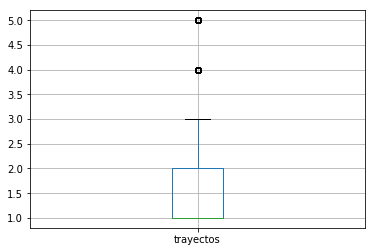

In [23]:
k.loc[k.trayectos <=5].boxplot(column='trayectos')
plt.show()

In [24]:
k.quantile(.9)

trayectos    3.0
Name: 0.9, dtype: float64

El 90% de usuarios realizaron 3 o menos trayectos en un dia, con una media de 1.81. El maximo registrado es 136 trayectos efectuados en un dia por el mismo usuario.

Veamos ahora la distribución de la variable travel_time

In [25]:
df.travel_time.describe()

count    3.980400e+05
mean     1.063844e+03
std      3.616002e+03
min      1.000000e+00
25%      4.750000e+02
50%      7.190000e+02
75%      1.088000e+03
max      1.346583e+06
Name: travel_time, dtype: float64

El 50% de los trayectos duran 12 minutos o menos

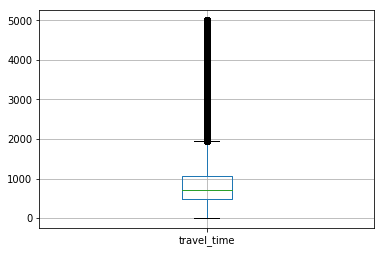

In [26]:
bx0 = df.loc[df.travel_time <= 5000].boxplot(column='travel_time')

Mediante el gráfico box-plot podemos considerar todos aquellos registros con un valor superior a 2000 segundos como outlier

Podemos representar la PDF para la variable travel_time restringiendo a valores inferiores a 2000 segundos

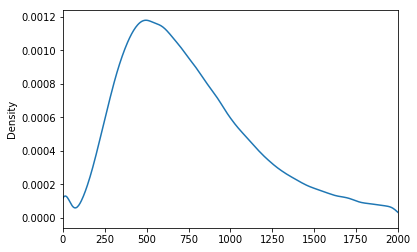

In [27]:
df.loc[df.travel_time <= 2000].travel_time.plot.kde()
plt.xlim(0,2000)
plt.show()

Analizamos mediante gráficos de box-plot la distribución de la variable travel_time agrupada por rango de edad así como por tipo de usuario

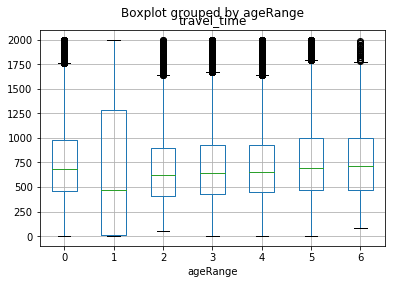

In [28]:
bx1 = df.loc[df.travel_time <= 2000].boxplot(column=['travel_time'], by='ageRange')


Vemos que los usuarios con edad comprendida entre 0 y 16 años tienen mayor asimetría en su distribución

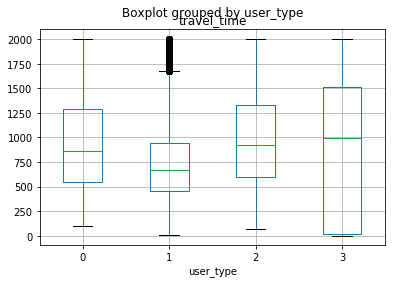

In [29]:
bx2 = df.loc[df.travel_time <= 2000].boxplot(column=['travel_time'], by='user_type')

En el caso de agrupación por tipo de usuario vemos que los usuarios del tipo trabajador, son lo que tienen mayor asimetría en la distribución de los datos.

Representemos ahora la función de densidad para la variable travel_time, en primer lugar agrupando por tipo de usuario

c:\users\asus\pycharmprojects\modelo0\venv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


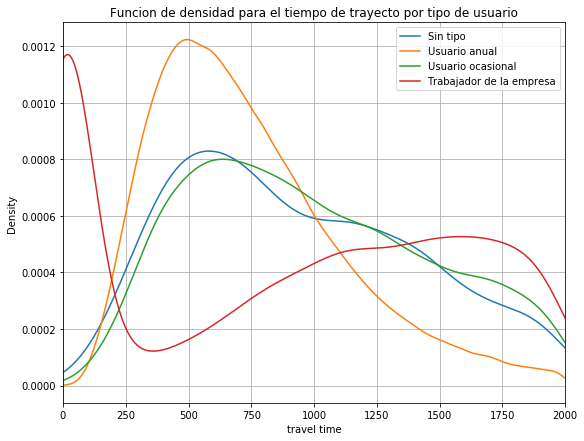

In [30]:
tipos=[0, 1, 2, 3]
fig = plt.figure(figsize=(9,7))

for tipo in tipos:
    df.loc[df.travel_time <= 2000][df.user_type == tipo].travel_time.plot(kind='kde')
plt.legend(('Sin tipo', 'Usuario anual', 'Usuario ocasional', 'Trabajador de la empresa'), loc=0)
plt.xlabel('travel time')
plt.ylabel('Density')
plt.grid(True)
plt.title('Funcion de densidad para el tiempo de trayecto por tipo de usuario')
plt.xlim(0, 2000)
plt.show()

Observando las PDFs, vemos que los usuarios ocasionales y sin tipo tienen un comportamiento similar, realizando trayectos de entre 500 y 1500 segundos, los usuarios anuales tienden a realizar trayectos de unos 500 segundos, mientras que los trabajadores realizan o trayectos muy cortos, inferiores a 250 segundos o trayectos largos, de mas de 1500 segundos

c:\users\asus\pycharmprojects\modelo0\venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


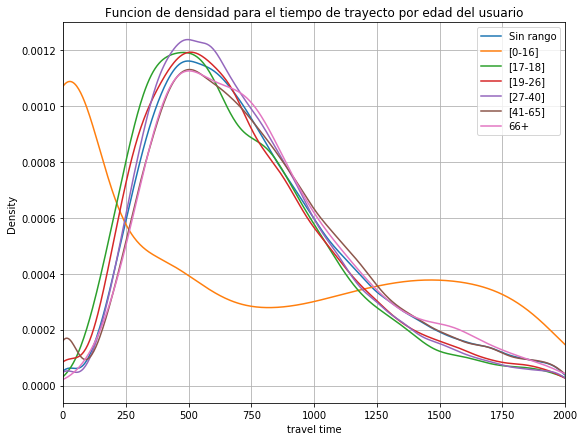

In [31]:
rangos = [0, 1, 2, 3, 4, 5, 6]
fig = plt.figure(figsize=(9,7))
for rango in rangos:
    df.loc[df.travel_time <= 2000][df.ageRange == rango].travel_time.plot(kind='kde')
plt.legend(('Sin rango', '[0-16]', '[17-18]', '[19-26]', '[27-40]', '[41-65]', '66+'), loc=0)
plt.xlabel('travel time')
plt.ylabel('Density')
plt.grid(True)
plt.title('Funcion de densidad para el tiempo de trayecto por edad del usuario')
plt.xlim(0, 2000)
plt.show()

Observando las PDFs vemos que todos los rangos de edad tienen un comportamiento similar, realizando trayectos de unos 500 segundos de media, salvo los usarios de entre 0 y 16 años que realizan trayectos de duración o muy corta o muy larga. Curiosamente los usuarios mas jovenes tienen comportamiento similar a los trabajadores

Ahora utilizando la variable que indica la fecha de desenganche de la estación obtenemos el dia y la hora en la que se efectúa el viaje.

Lo primero es pasar la variable de formato string a timestamp y luego a UTC2 para expresarla en la zona horaria correcta

In [32]:
bicis['fechas'] = pd.to_datetime(bicis.unplug_hourTime)
bicis['fechas_utc2'] = bicis.fechas+timedelta(hours=2)

In [33]:
bicis['day'] = bicis.fechas_utc2.apply(lambda x: x.day)
bicis['hour'] = bicis.fechas_utc2.apply(lambda x: x.hour)

Con estos datos, podemos ver la distribución de trayectos por dia y por hora para cada tipo de usuario y rango de edad:

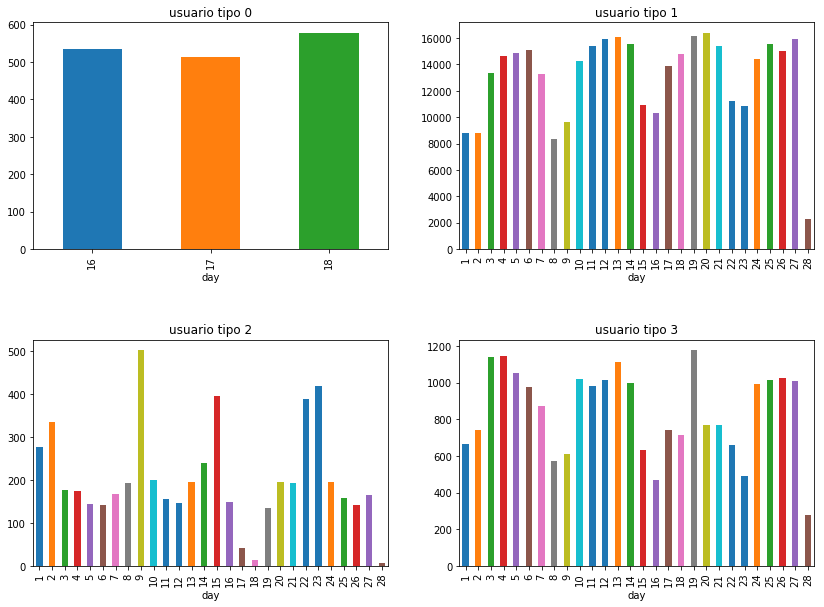

In [34]:
fig = plt.figure(figsize=(14,10))
tipos = list(range(4))

i = 221

for tipo in tipos:
    plt.subplot(i)
    bicis.loc[bicis.user_type==tipo].groupby('day').size().plot.bar()
    plt.title('usuario tipo '+str(tipo))
    i+=1

plt.subplots_adjust(hspace=.4)
plt.show()

Los usuarios con pase anual y trabajadores tienen una distribución similar con una periodicidad de 5 dias, realizando mayor número de trayectos los dias entre semana, y un número inferior los fines de semana

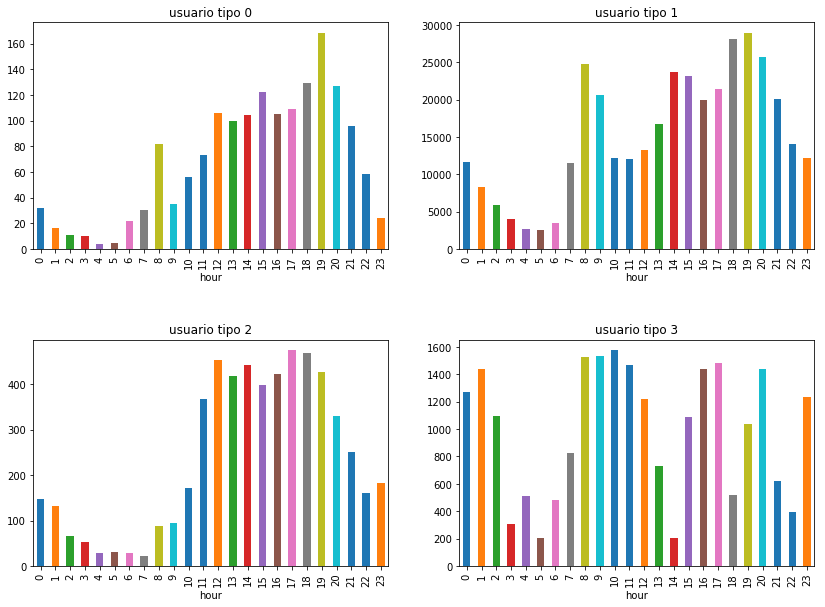

In [35]:
fig = plt.figure(figsize=(14,10))
tipos = list(range(4))

i = 221

for tipo in tipos:
    plt.subplot(i)
    bicis.loc[bicis.user_type==tipo].groupby('hour').size().plot.bar()
    plt.title('usuario tipo '+str(tipo))
    i+=1

plt.subplots_adjust(hspace=.4)
plt.show()

En este caso vemos que los usuarios del tipo anual realizan mas trayectos en las horas clave de entrada y salida del trabajo (8-9h y 18-19h), los usuarios ocasionales usan mas el servicio a mediodia y por la tarde, mientras que los trabajadores aparte de las horas punta laborales también lo usan de madrugada (1-2h am)

Veamos ahora comportamiento por rango de edad:

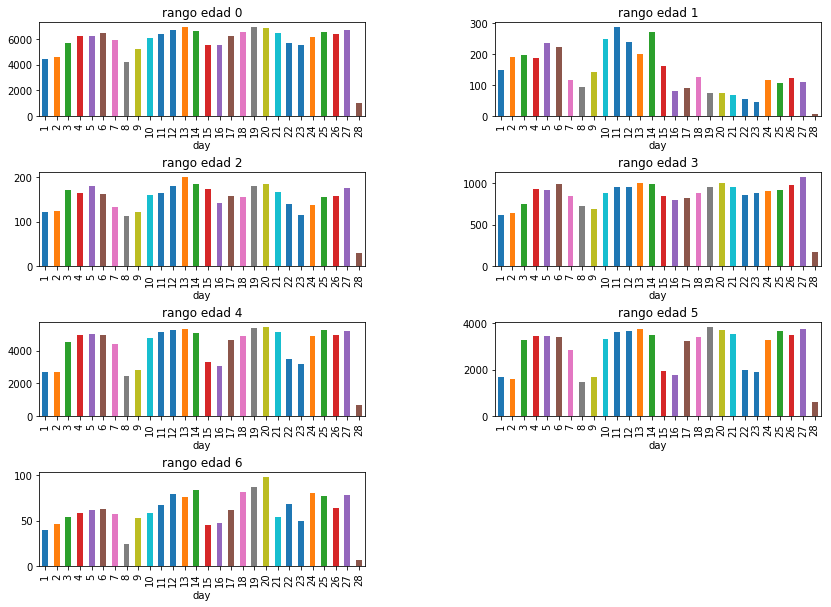

In [36]:
fig = plt.figure(figsize=(14,10))
tipos = list(range(7))

i = 421

for tipo in tipos:
    plt.subplot(i)
    bicis.loc[bicis.ageRange==tipo].groupby('day').size().plot.bar()
    plt.title('rango edad '+str(tipo))
    i+=1

plt.subplots_adjust(hspace=.6, wspace=.4)
plt.show()

Aquí cabe destacar los usuarios mas jovenes, menores de 26 años, hacen un mayor uso los jueves, viernes y fines de semana mientras que usuarios mayores de 27 años realizan más trayectos los dias entre semana y menos los sábados y domingos.

In [ ]:
fig = plt.figure(figsize=(14,10))
tipos = list(range(7))

i = 421

for tipo in tipos:
    plt.subplot(i)
    bicis.loc[bicis.ageRange==tipo].groupby('hour').size().plot.bar()
    plt.title('rango edad '+str(tipo))
    i+=1

plt.subplots_adjust(hspace=.6, wspace=.4)
plt.show()

Por último, al agrupar por rango de edad y hora, vemos que los usuarios menores de 26 años tienden a hacer mas viajes entre las 18h y las 20h, los usarios de entre 27 y 65 años realizan mas viajes en las horas de entrada/salida del trabajo y a la hora de comer mientras que los usuarios mayores de 66 años prefieres usar el servicio a mediodia.